In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage import measure,morphology
from skimage.measure import regionprops
import matplotlib.patches as patches

# Loading Image and grayscale it. Also otsu binarization

(730, 1305)


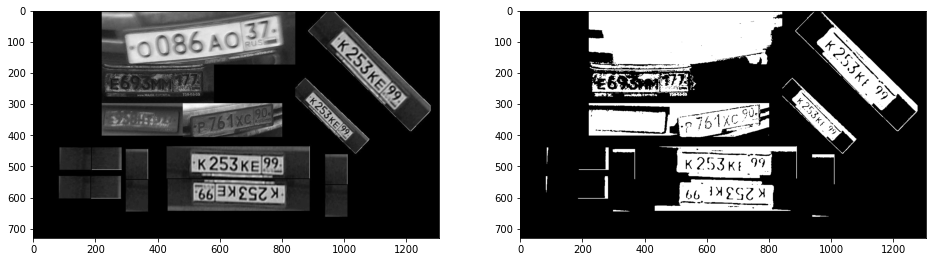

In [2]:
car_image = imread("2020-12-08_21-05-20.jpg",as_gray=True)

print(car_image.shape)
gray_car_image = car_image * 255

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)*0.7
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image, cmap="gray")
plt.show()

# Get all the connected regions, filter them out, and draw a neat border

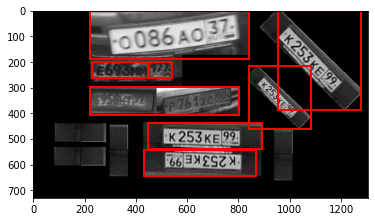

In [13]:
label_image = measure.label(binary_car_image)
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")
# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    if region.area <= 3000 :
        #if the region is so small then it's likely not a license plate
        continue

    # the bounding box coordinates
    minRow, minCol, maxRow, maxCol = region.bbox
    rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rectBorder)
    # let's draw a red rectangle over those regions
plt.show()